<a href="https://colab.research.google.com/github/Srivarshinie/iris/blob/main/iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import sklearn
import numpy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
!pip install scikit-learn==1.3.0

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
df= pd.read_csv("/content/drive/MyDrive/Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df = df.drop(columns=['Id'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [10]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

<Axes: >

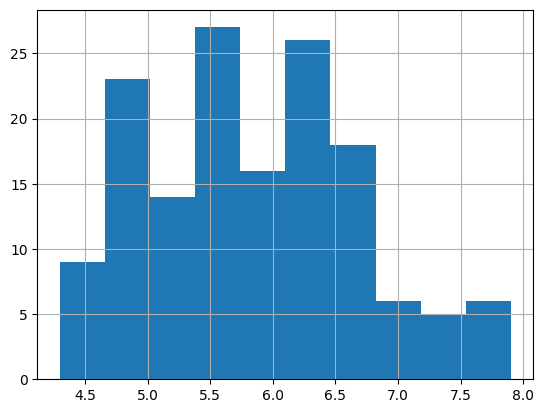

In [11]:
df['SepalLengthCm'].hist()

<Axes: >

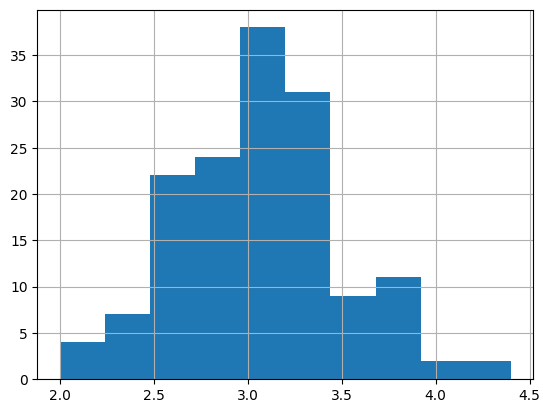

In [12]:
df['SepalWidthCm'].hist()

<Axes: >

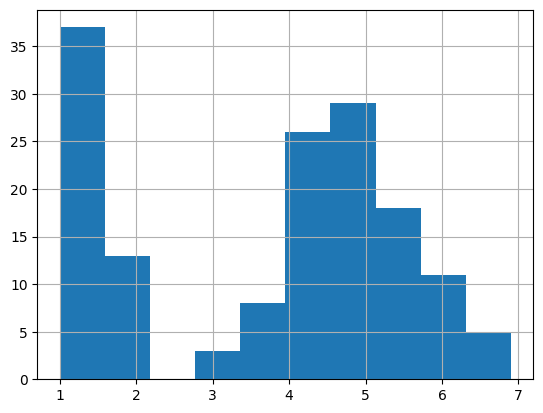

In [13]:
df['PetalLengthCm'].hist()

<Axes: >

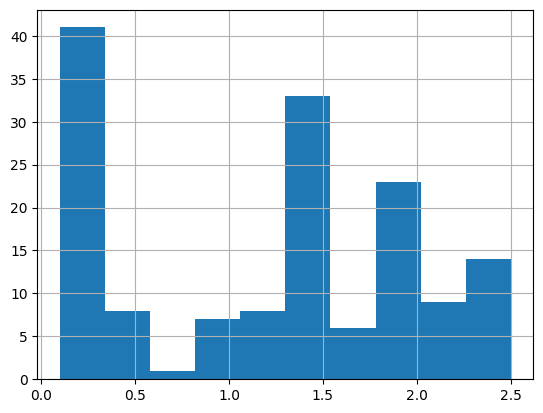

In [14]:
df['PetalWidthCm'].hist()

In [15]:
colors=['red','orange','blue']
species=['virginica','versicolor','setosa']

In [16]:
print(df.columns)


Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


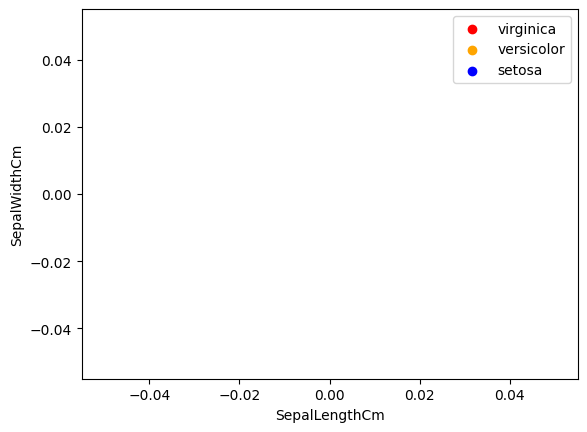

In [17]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c=colors[i], label=species[i])

plt.xlabel("SepalLengthCm")
plt.ylabel("SepalWidthCm")
plt.legend()
plt.show()

In [18]:
print(df.columns)


Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


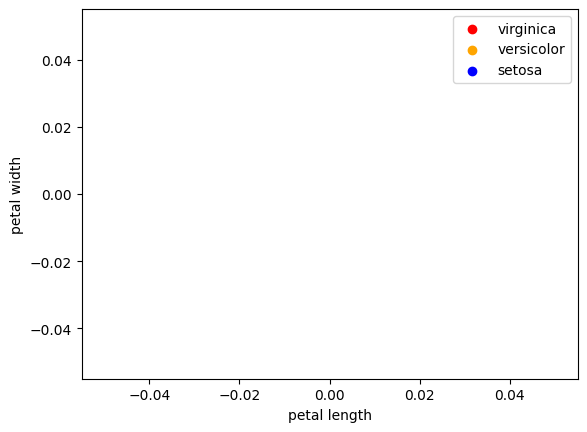

In [19]:
for i in range(3):
  x = df[df['Species']==species[i]]
  plt.scatter(x['PetalLengthCm'],x['PetalWidthCm'], c = colors[i],label=species[i])
plt.xlabel("petal length")
plt.ylabel("petal width")
plt.legend()
plt.show()

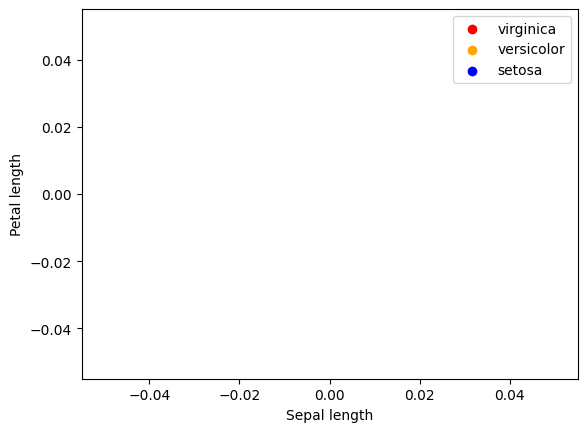

In [20]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the existing dataset
df = pd.read_csv('/content/drive/MyDrive/Iris.csv')  # Replace 'your_dataset.csv' with the path to your CSV file

colors = ['red', 'orange', 'blue']
species = ['virginica', 'versicolor', 'setosa']

for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['PetalLengthCm'], c=colors[i], label=species[i])

plt.xlabel("Sepal length")
plt.ylabel("Petal length")
plt.legend()
plt.show()


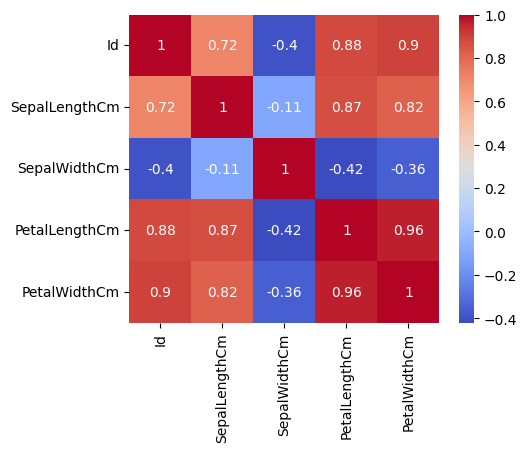

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the existing dataset
df = pd.read_csv('/content/drive/MyDrive/Iris.csv')  # Replace 'your_dataset.csv' with the path to your CSV file

# Exclude non-numeric columns before computing correlation
numeric_df = df.drop(columns=['Species'])

# Compute correlation
corr = numeric_df.corr()

# Plot heatmap
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(corr, annot=True, ax=ax, cmap='coolwarm')
plt.show()


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import pickle
X = df.drop(columns=['Species'])
Y = df['Species']
x_train, x_test, y_train,y_test = train_test_split(X,Y,test_size=0.30)

In [23]:
model = LogisticRegression()
model.fit(x_train,y_train)
print("Logistic regression accuracy:",model.score(x_test,y_test)*88)

Logistic regression accuracy: 88.0


In [24]:
model.fit(x_train.values,y_train.values)

LogisticRegression()

In [25]:
print("accuracy:",model.score(x_test,y_test)*100)

accuracy: 100.0


In [30]:
model= KNeighborsClassifier()
model.fit(x_train.values,y_train.values)
print("knn accuracy:",model.score(x_test,y_test)*93)

knn accuracy: 93.0


In [27]:
model.fit(x_train.values,y_train.values)

KNeighborsClassifier()

In [29]:
print("accuracy:",model.score(x_test,y_test)*93)

accuracy: 100.0


In [32]:
model = DecisionTreeClassifier()
model.fit(x_train.values,y_train.values)
print("decision tree accuracy:",model.score(x_test,y_test)*86)

decision tree accuracy: 86.0


In [33]:
model.fit(x_train.values,y_train.values)

DecisionTreeClassifier()

In [34]:
print("accuracy:",model.score(x_test,y_test)*86)

accuracy: 86.0
